# Project 2: Ames Housing Data and Kaggle Challenge

## Visualize the Data
---

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, RidgeCV
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
# read in the pre-processed data
housing = pd.read_csv('cleaned_datasets/housing_preprocessed1_data.csv')
housing.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,...,miscval,mosold,yrsold,saletype,saleprice,has_garage,has_pool,has_basement,has_fence,has_alley
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,0,3,2010,WD,130500,1,0,1,0,0
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,4,2009,WD,220000,1,0,1,0,0
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,1,2010,WD,109000,1,0,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,4,2010,WD,174000,1,0,1,0,0
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,3,2010,WD,138500,1,0,1,0,0


In [41]:
housing['saleprice'].min()

12789

In [5]:
housing.shape

(2046, 82)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2046 non-null   int64  
 1   pid            2046 non-null   int64  
 2   mssubclass     2046 non-null   int64  
 3   mszoning       2046 non-null   object 
 4   lotfrontage    1716 non-null   float64
 5   lotarea        2046 non-null   int64  
 6   street         2046 non-null   object 
 7   lotshape       2046 non-null   object 
 8   landcontour    2046 non-null   object 
 9   utilities      2046 non-null   object 
 10  lotconfig      2046 non-null   object 
 11  landslope      2046 non-null   object 
 12  neighborhood   2046 non-null   object 
 13  condition1     2046 non-null   object 
 14  condition2     2046 non-null   object 
 15  bldgtype       2046 non-null   object 
 16  housestyle     2046 non-null   object 
 17  overallqual    2046 non-null   int64  
 18  overallc

In [7]:
housing['saleprice'].describe()
# just confirming that there isn't anything weird with min SalePrice - negative val
# the max is far from the mean which could indicate outliers

count      2046.000000
mean     181493.596774
std       79285.959643
min       12789.000000
25%      129812.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

### cleaning nulls

In [8]:
nulls = pd.DataFrame(housing.isna().sum())
nulls.loc[nulls[0] != 0]

,0
lotfrontage,330
masvnrtype,22
masvnrarea,22
bsmtqual,53
bsmtcond,53
bsmtexposure,56
bsmtfintype1,53
bsmtfintype2,54
garagetype,113
garageyrblt,113


In [9]:
#replace w/ median
housing['lotfrontage'].replace(np.NaN, housing['lotfrontage'].median, inplace=True)
housing['masvnrarea'].replace(np.NaN, housing['masvnrarea'].median, inplace=True)
housing['garageyrblt'].replace(np.NaN, housing['masvnrarea'].median, inplace=True)

In [10]:
# replace with str 'NA'
housing['bsmtqual'].replace(np.NaN, 'NA',inplace=True)
housing['bsmtcond'].replace(np.NaN, 'NA',inplace=True)
housing['bsmtexposure'].replace(np.NaN, 'NA',inplace=True)
housing['bsmtfintype1'].replace(np.NaN, 'NA',inplace=True)
housing['bsmtfintype2'].replace(np.NaN, 'NA',inplace=True)
housing['garagetype'].replace(np.NaN, 'NA',inplace=True)
housing['garagequal'].replace(np.NaN, 'NA',inplace=True)
housing['garagecond'].replace(np.NaN, 'NA',inplace=True)
housing['miscfeature'].replace(np.NaN, 'NA',inplace=True)
housing['garagefinish'].replace(np.NaN, 'NA',inplace=True)

In [11]:
# replace w/ most frequent
housing['masvnrtype'].replace(np.NaN, 'None',inplace=True)

In [12]:
nulls = pd.DataFrame(housing.isna().sum())
nulls.loc[nulls[0] != 0]

,0


In [13]:
housing.shape

(2046, 82)

---

### Exploratory Visualizations PT 2
---

- How does neighborhood impact housing sale price? What neighbors have a higher mean sale price?
- What is the distribution of building types & house styles in the dataset?
- How many of the homes were remodeled recently? What was the saleprice?
- How do these features correlate to saleprice independently? KitchenQual, Gr Liv Area, Garage Type, Garage Area, Fence Quality

In [16]:
# creating a copy of the dataframe to use for visualizations
housing_EDA = housing.copy()

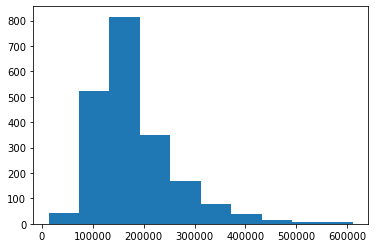

In [17]:
# plotting the distribution of sale price
plt.hist(housing_EDA['saleprice']);

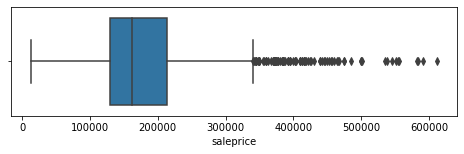

In [18]:
# plotting box plot of saleprice
plt.figure(figsize=(8,2))
sns.boxplot(data = housing_EDA,
            x = 'saleprice',
            orient='h');

# I can see outliers here based on the boxplot

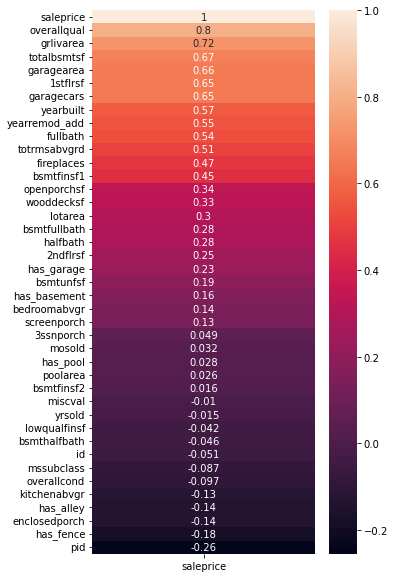

In [19]:
plt.figure(figsize = (5,10))
sns.heatmap(housing_EDA.corr()[['saleprice']].sort_values(['saleprice'], ascending=False), annot=True);

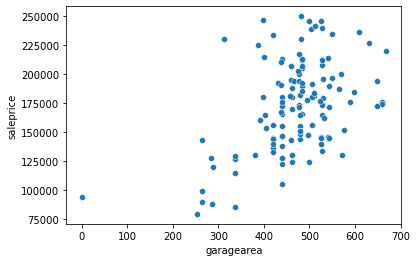

In [58]:
#homes with garage & homes without

# plotting scatter garagearea to salesprice
# plt.figure(figsize = (12,8))
sns.scatterplot(data=price, x='garagearea', y='saleprice');
           
# plt.xlim(0,4000);

In [59]:
housing_EDA['garagetype'].value_counts()
# sns.scatterplot(data=price, x='garagearea', y='saleprice');

Attchd     1210
Detchd      534
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garagetype, dtype: int64

''

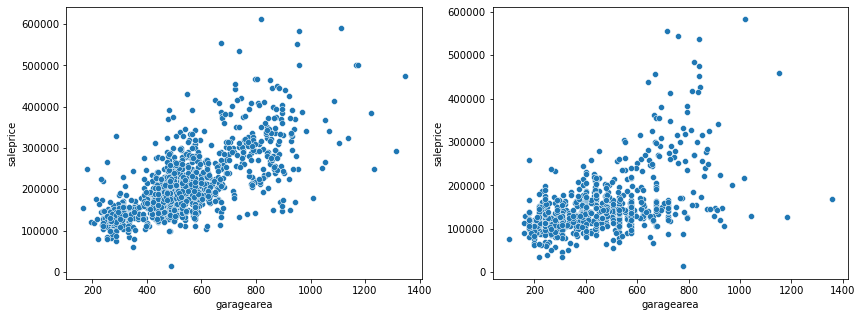

In [67]:
attched = housing_EDA[housing_EDA['garagetype'] == 'Attchd']
notattched = housing_EDA[(housing_EDA['garagetype'] != 'Attchd') & (housing_EDA['garagetype'] != 'NA')]

fig, axes = plt.subplots(1,2, figsize = (14,5))

plot1 = sns.scatterplot(ax = axes[0],data=attched, x='garagearea', y='saleprice')
plot2 = sns.scatterplot(ax = axes[1], data=notattched, x='garagearea', y='saleprice')
;

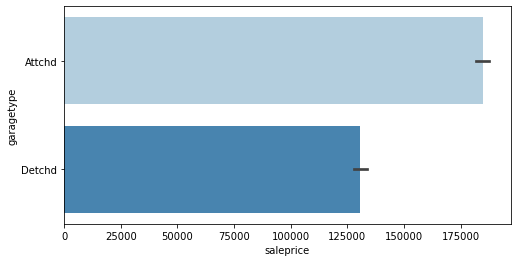

In [116]:
garage = housing_EDA[((housing_EDA['garagetype'] == 'Attchd') | (housing_EDA['garagetype'] == 'Detchd')) & (housing_EDA['saleprice'] <=300_000)]
garage

plt.figure(figsize=(8,4))
sns.barplot(data=garage,
                y='garagetype', 
                x='saleprice',
                orient='h',
                palette='Blues'
                );

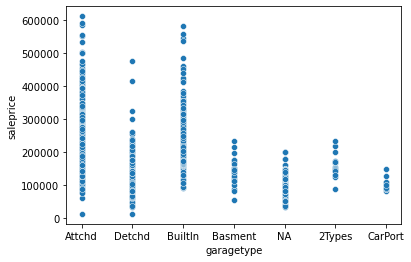

In [73]:
sns.scatterplot(data=housing_EDA,
                x='garagetype', 
                y='saleprice');

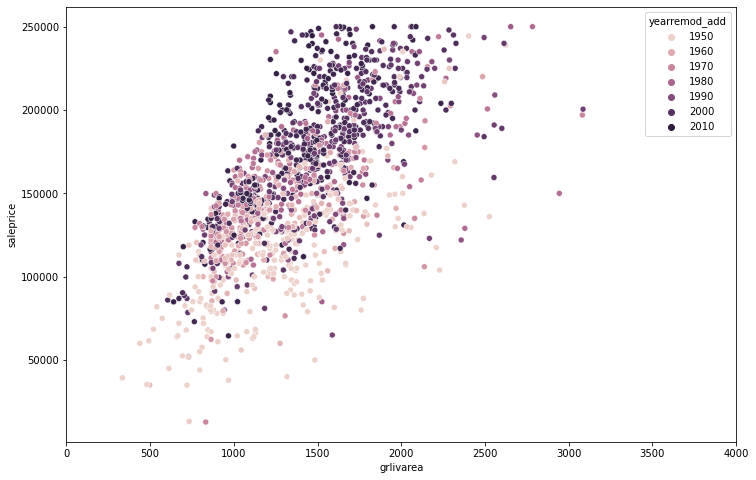

In [20]:
# plotting some scatter plots to salesprice
price = housing_EDA[(housing_EDA['saleprice'] <= 250000) & (housing_EDA['bldgtype'] == '1Fam')]
plt.figure(figsize = (12,8))
sns.scatterplot(data=price, x='grlivarea', y='saleprice', hue='yearremod_add')
plt.xlim(0,4000);

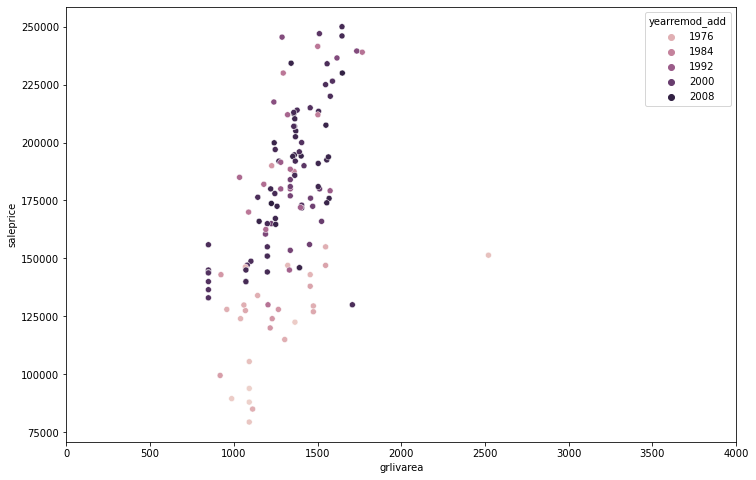

In [21]:
# plotting some scatter plots to salesprice
price = housing_EDA[(housing_EDA['saleprice'] <= 250000) & ((housing_EDA['bldgtype'] == 'TwnhsE') | (housing_EDA['bldgtype'] == 'TwnhsI'))]
plt.figure(figsize = (12,8))
sns.scatterplot(data=price, x='grlivarea', y='saleprice', hue='yearremod_add')
plt.xlim(0,4000);

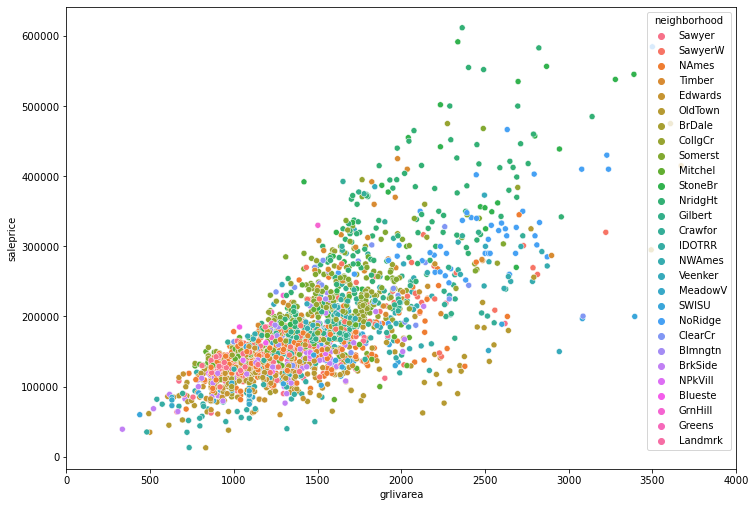

In [22]:
# scatter plots gr liv area to salesprice
# how does sale price trend if the house has a basement
plt.figure(figsize = (12,8.5))
sns.scatterplot(data=housing_EDA, x='grlivarea', y='saleprice', hue='neighborhood')
plt.xlim(0,4000);

In [23]:
#mean saleprice and gr live area grouped by neighborhood
neighborhood = housing_EDA.groupby('neighborhood')[['saleprice']].mean().reset_index()
neighborhood.sort_values(by='saleprice', ascending=False)

,neighborhood,saleprice
25,StoneBr,329675.736842
19,NridgHt,322831.352459
18,NoRidge,316294.125000
10,GrnHill,280000.000000
27,Veenker,253570.588235
26,Timber,241051.354167
24,Somerst,227183.900000
4,ClearCr,217490.074074
6,Crawfor,205901.211268
5,CollgCr,202497.216667


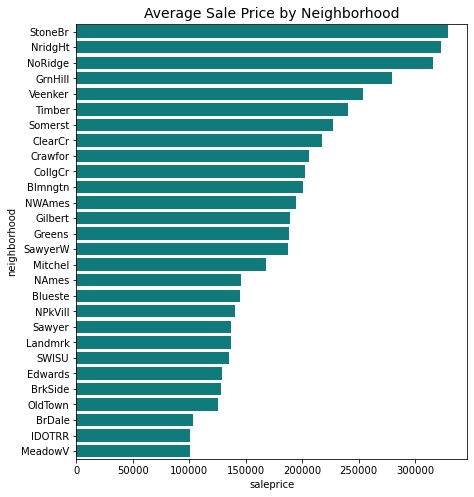

In [24]:
#average sale price of homes by neighborhood
plt.figure(figsize = (7,8))
sns.barplot(data=neighborhood.sort_values(by='saleprice', ascending=False),
            orient='h',
            x='saleprice',
            y='neighborhood',
           color='darkcyan')
plt.xlabel('saleprice')
plt.title('Average Sale Price by Neighborhood',
         fontsize=14,
         fontweight=10);

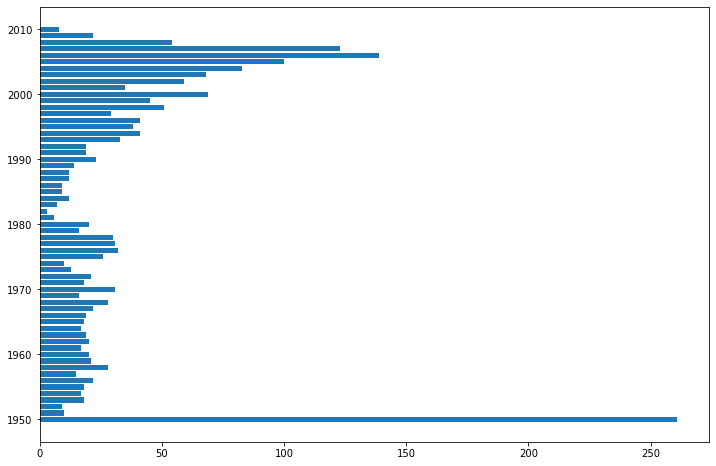

In [25]:
# creating a df of number of homes remodelled b year
remodel = pd.DataFrame(housing_EDA['yearremod_add'].value_counts()).reset_index()
remodel.sort_values(by='index', inplace=True)

plt.figure(figsize = (12,8))
plt.barh(data=remodel, y='index', width='yearremod_add', height=0.8);

# As expected, we can see here that that as the size of home goes up, so does price.
# You can see though that even though there are more newly remodeled large homes, there are also remodelled smaller homes as well!

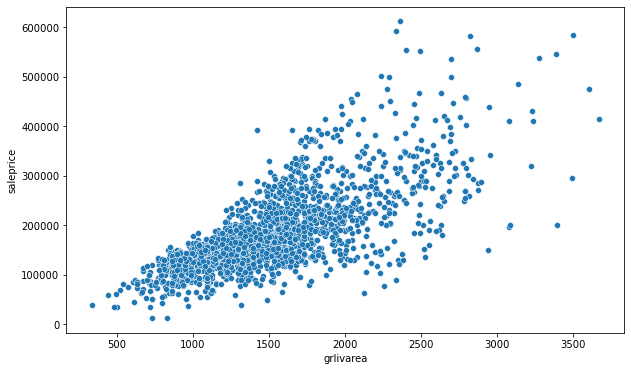

In [26]:
# plotting some scater plots to salesprice
plt.figure(figsize = (10,6))
sns.scatterplot(data=housing_EDA, x='grlivarea', y='saleprice');

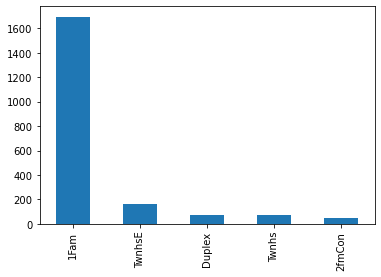

In [27]:
#count of bldg type in dataset
housing_EDA['bldgtype'].value_counts().plot(kind='bar');

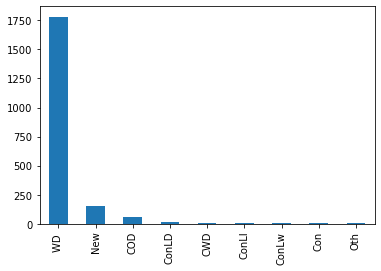

In [28]:
# based on my question, I was wondering if count of saletype is an indicator of participating in the housing program
# sample size is small though so will not use this for any insights
housing_EDA['saletype'].value_counts().plot(kind='bar');

In [29]:
# exploring data for homebuyers that qualify for low-interest, low-mortgage rate programs
homebuyer = housing_EDA[(housing_EDA['saletype'] == 'ConLI') | (housing_EDA['saletype'] == 'ConLD') | (housing_EDA['saletype'] == 'ConLw')]

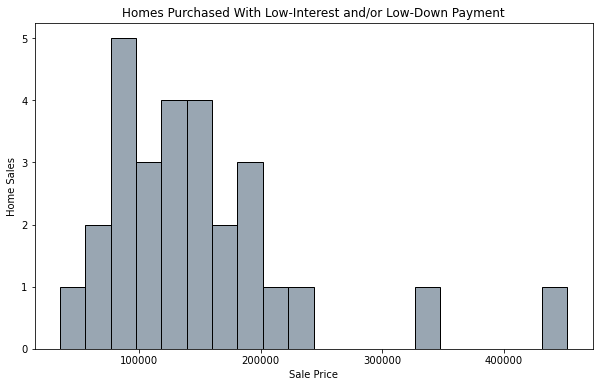

In [30]:
homebuyer = homebuyer.sort_values('saleprice', ascending = False)
plt.figure(figsize = (10,6))

sns.histplot(data=homebuyer, x='saleprice', bins=20, color='lightslategrey')
plt.title('Homes Purchased With Low-Interest and/or Low-Down Payment')
plt.xlabel('Sale Price')
plt.ylabel('Home Sales');

# not sure if the filtering I did above represent homebuyers from the HOME program. If it does, it does indicate that the typical house price stays below 250K

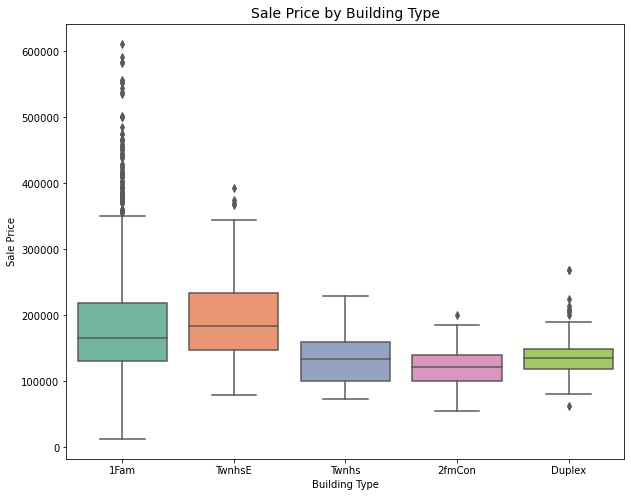

In [43]:
#box plot bldgtype/saleprice
bldgtype = housing_EDA[['saleprice','bldgtype']]


plt.subplots(figsize=(10, 8))
sns.boxplot(x='bldgtype',
            y="saleprice",
            data=bldgtype,
            palette="Set2")
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.title('Sale Price by Building Type',
          fontsize=14,
         fontweight=10);

# based on this box plot you can see that the range for townhomes is smaller, which could help to limit choices to townhomes

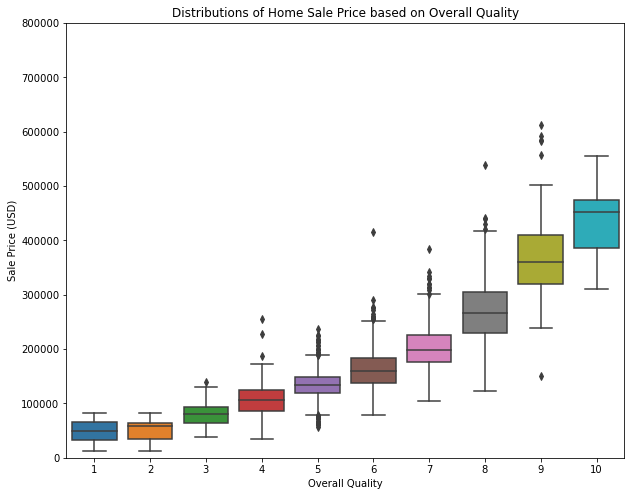

In [33]:
#box plot overallqual/saleprice
overqual = housing_EDA[['saleprice', 'overallqual']]
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='overallqual', y="saleprice", data=overqual)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price (USD)')
plt.title('Distributions of Home Sale Price based on Overall Quality');

## Final Data Visualizations

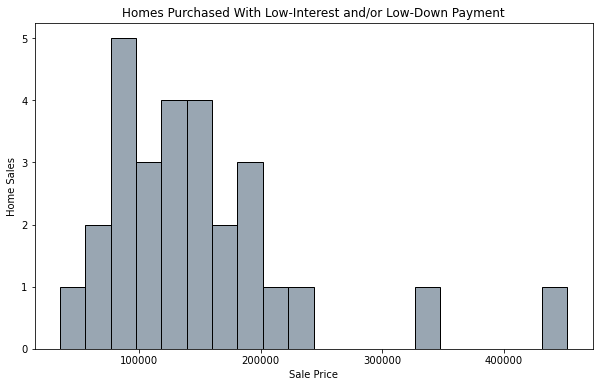

In [34]:
# what we know about home prices purchased with low down or low interest rates

homebuyer = homebuyer.sort_values('saleprice', ascending = False)
plt.figure(figsize = (10,6))

sns.histplot(data=homebuyer, x='saleprice', bins=20, color='lightslategrey')
plt.title('Homes Purchased With Low-Interest and/or Low-Down Payment')
plt.xlabel('Sale Price')
plt.ylabel('Home Sales');

plt.savefig('/Users/debbiesim/Desktop/GADSI-Course/Projects/project-2/plots/saletypehist.png', dpi=300, bbox_inches = "tight")

# not sure if the filtering I did above represent homebuyers from the HOME program. If it does, it does indicate that the typical house price stays below 250K

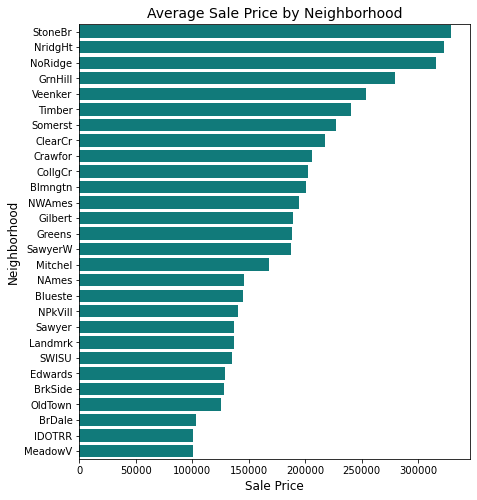

In [131]:
#average sale price of homes by neighborhood
plt.figure(figsize = (7,8))
sns.barplot(data=neighborhood.sort_values(by='saleprice', ascending=False),
            orient='h',
            x='saleprice',
            y='neighborhood',
           color='darkcyan')
plt.xlabel('Sale Price', fontweight=12, fontsize=12)
plt.ylabel('Neighborhood', fontweight=12, fontsize=12)
plt.title('Average Sale Price by Neighborhood',
         fontsize=14,
         fontweight=10);

plt.savefig('/Users/debbiesim/Desktop/GADSI-Course/Projects/project-2/plots/plotsneighborhood.png', dpi=300, bbox_inches = "tight")

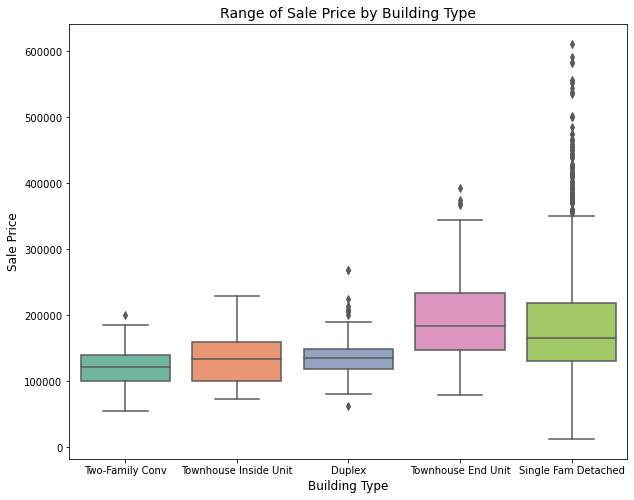

In [134]:
#box plot bldgtype/saleprice
bldgtype = housing_EDA[['saleprice','bldgtype']]

plt.subplots(figsize=(10, 8))
ax=sns.boxplot(x='bldgtype',
            y="saleprice",
            data=bldgtype,
            order = ['2fmCon', 'Twnhs', 'Duplex', 'TwnhsE', '1Fam'],
            palette="Set2")
plt.xlabel('Building Type', fontsize=12, fontweight=10)
plt.ylabel('Sale Price',fontsize=12, fontweight=10)
plt.title('Range of Sale Price by Building Type',
          fontsize=14,
         fontweight=10)

labels=['Two-Family Conv','Townhouse Inside Unit', 'Duplex', 'Townhouse End Unit', 'Single Fam Detached']
ax.set_xticklabels(labels);


# based on this box plot you can see that the range for townhomes is smaller, which could help to limit choices to townhomes

plt.savefig('/Users/debbiesim/Desktop/GADSI-Course/Projects/project-2/plots/boxplot-bldgtype.png', dpi=300, bbox_inches = "tight")

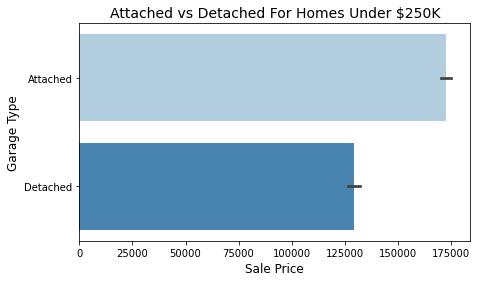

In [151]:
garage = housing_EDA[((housing_EDA['garagetype'] == 'Attchd') | (housing_EDA['garagetype'] == 'Detchd')) & (housing_EDA['saleprice'] <=250_000)]
garage

plt.figure(figsize=(7,4))
ax=sns.barplot(data=garage,
                y='garagetype', 
                x='saleprice',
                orient='h',
                palette='Blues'
                )
plt.xlabel('Sale Price', fontsize=12, fontweight=10)
plt.ylabel('Garage Type', fontsize=12, fontweight=10)
plt.title('Attached vs Detached For Homes Under $250K',
          fontsize=14,
         fontweight=10)
labels=['Attached', 'Detached']
ax.set_yticklabels(labels);

plt.savefig('/Users/debbiesim/Desktop/GADSI-Course/Projects/project-2/plots/barplot-garage.png',dpi=300, bbox_inches = "tight")

In [144]:
pd.DataFrame(garage['garagetype'].value_counts()).reset_index()

,index,garagetype
0,Attchd,1079
1,Detchd,530


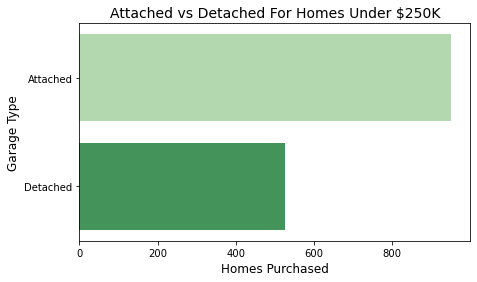

In [149]:
garage = housing_EDA[((housing_EDA['garagetype'] == 'Attchd') | (housing_EDA['garagetype'] == 'Detchd')) & (housing_EDA['saleprice'] <=250_000)]
garage1 = pd.DataFrame(garage['garagetype'].value_counts()).reset_index()

plt.figure(figsize=(7,4))
ax=sns.barplot(data=garage1,
                y='index', 
                x='garagetype',
                orient='h',
                palette='Greens'
                )
plt.xlabel('Homes Purchased', fontsize=12, fontweight=10)
plt.ylabel('Garage Type', fontsize=12, fontweight=10)
plt.title('Attached vs Detached For Homes Under $250K',
          fontsize=14,
         fontweight=10)
labels=['Attached', 'Detached']
ax.set_yticklabels(labels);

plt.savefig('/Users/debbiesim/Desktop/GADSI-Course/Projects/project-2/plots/barplot-garage2.png',dpi=300, bbox_inches = "tight")

## Conclusions and Recommendations
---

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

I focused on 3 specific features to answer the problem statement. The following are my conclusions based on both exploratory data analysis and the linear regression model that I applied. 

- Neighborhood selection is important in guaranteeing a home price in range. As expected it's evident that there are neighborhoods where home prices are much more expensive than others. Homebuyers should try to look in neighborhoods other than Stone Brook, Northridge Heights, and Northridge.
- An attached garage is a feature that will increase the cost of sale price, but can be included in the list of must-haves because it’s more common for a home to have an attached garage than not.
- You don’t need to be selective about house type because there are homes within a reasonable price range for all types. But single family & end-unit townhomes will see higher prices.


**Potential Next Steps**
- refine my model by being more selective of features before running it through VIF
- look into other features such as kitchen quality and backyard size
